In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"Air Passenger Data.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


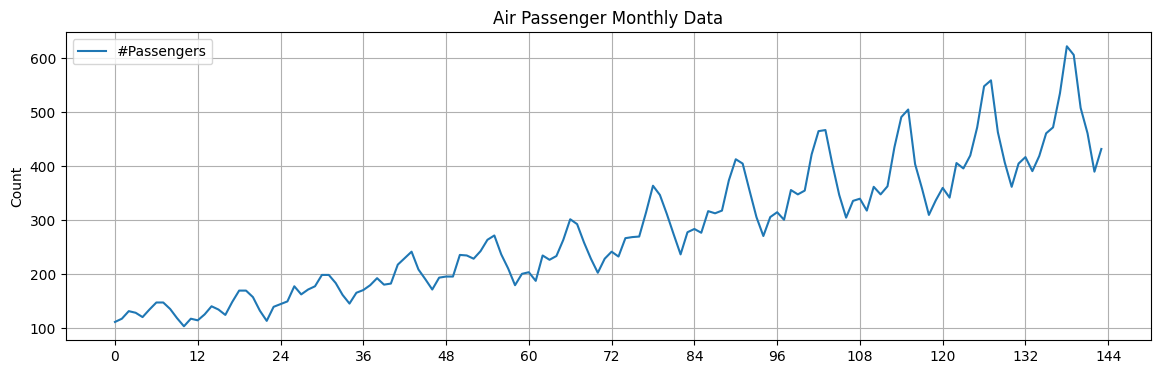

In [4]:
df.plot(figsize=(14, 4), ylabel = "Count", title="Air Passenger Monthly Data")
plt.xticks(range(0,145,12))
plt.grid()
plt.show()

In [5]:
df.set_index("Month",inplace=True)

In [6]:
df.columns = ["Values"]

In [7]:
df.set_index(pd.to_datetime(df.index), inplace=True)

In [8]:
result = seasonal_decompose(df)

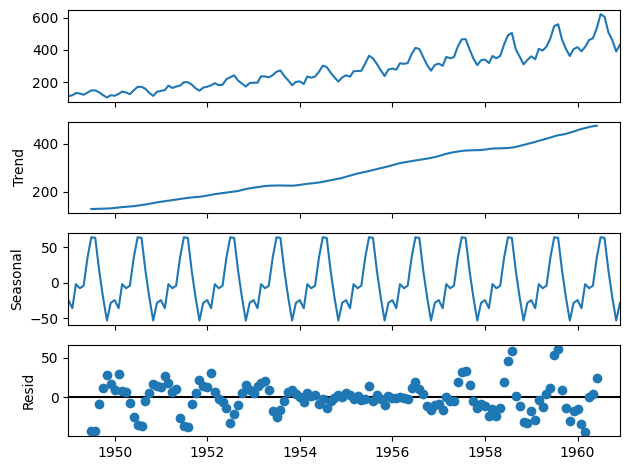

In [9]:
result.plot();

In [10]:
best_order = (4,2,3)

In [11]:
model = ARIMA(df, order = best_order)

In [12]:
rs = model.fit()

In [13]:
forecast = rs.get_forecast(steps=12)

In [14]:
forecast.predicted_mean

1961-01-01    476.780672
1961-02-01    480.725320
1961-03-01    488.210973
1961-04-01    464.646142
1961-05-01    479.032882
1961-06-01    477.047542
1961-07-01    480.675216
1961-08-01    492.256212
1961-09-01    479.537098
1961-10-01    497.542206
1961-11-01    486.643408
1961-12-01    496.471168
Freq: MS, Name: predicted_mean, dtype: float64

In [15]:
df.tail()

,Values
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


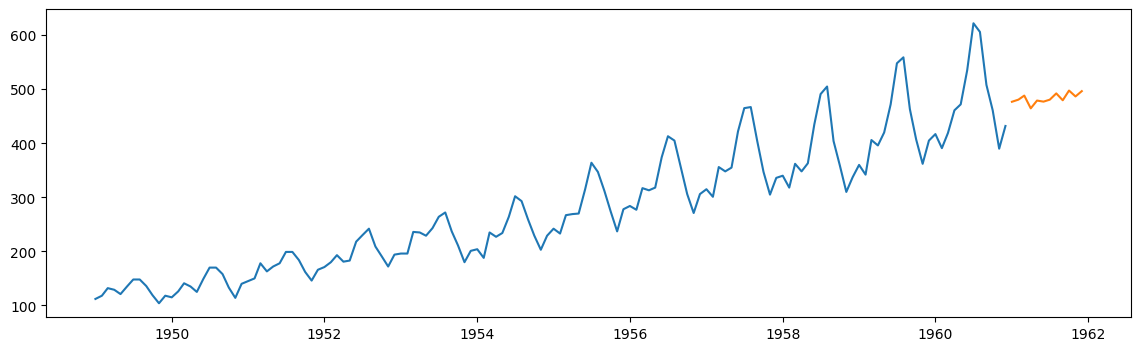

In [16]:
plt.figure(figsize=(14,4))
plt.plot(df["Values"])
plt.plot(forecast.predicted_mean)
plt.show()

In [17]:
rs.aic

np.float64(1376.4644923351188)

In [18]:
best_pdq = None
best_aic = np.inf

In [19]:
for p in range(9,14):
    for d in range(1,5):
        for q in range(6,12):
            m = ARIMA(df,order = (p,d,q))
            res = m.fit()
            
            if res.aic < best_aic:
                best_aic = res.aic
                best_order =(p,d,q)
        print("AIC :-", res.aic, "Order :-", (p,d,q))

AIC :- 1279.9305985598544 Order :- (9, 1, 11)
AIC :- 1305.2290472765271 Order :- (9, 2, 11)
AIC :- 1318.119485133469 Order :- (9, 3, 11)
AIC :- 1317.3811495900572 Order :- (9, 4, 11)
AIC :- 1232.2812680581637 Order :- (10, 1, 11)
AIC :- 1177.4401526872766 Order :- (10, 2, 11)
AIC :- 1214.40519386709 Order :- (10, 3, 11)
AIC :- 1318.315212486383 Order :- (10, 4, 11)
AIC :- 1176.9861686430304 Order :- (11, 1, 11)
AIC :- 1148.9393593377752 Order :- (11, 2, 11)
AIC :- 1174.7875283792396 Order :- (11, 3, 11)
AIC :- 1224.2502779765427 Order :- (11, 4, 11)
AIC :- 1155.846430621249 Order :- (12, 1, 11)
AIC :- 1156.0699065789636 Order :- (12, 2, 11)
AIC :- 1202.992831001371 Order :- (12, 3, 11)
AIC :- 1254.6838633041248 Order :- (12, 4, 11)
AIC :- 1154.232078134609 Order :- (13, 1, 11)
AIC :- 1154.0042450331498 Order :- (13, 2, 11)
AIC :- 1194.5875578127398 Order :- (13, 3, 11)
AIC :- 1285.411532545893 Order :- (13, 4, 11)


In [20]:
best_aic

np.float64(1140.068743325428)

In [21]:
best_order

(11, 2, 7)

In [22]:
final_model = ARIMA(df, order= best_order)

In [23]:
final_result = final_model.fit()

In [24]:
final_forecast= final_result.get_forecast(steps=24)

In [25]:
predictions = final_forecast.predicted_mean

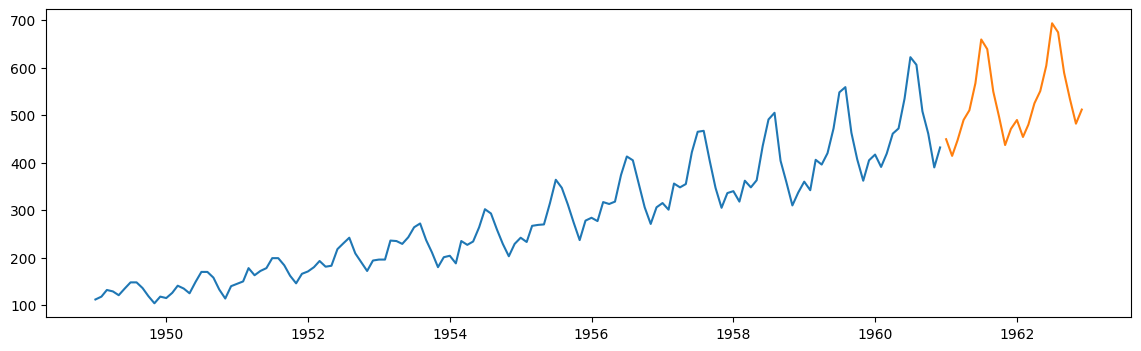

In [26]:
plt.figure(figsize=(14,4))
plt.plot(df["Values"])
plt.plot(predictions)
plt.show() 